# Web Scraping Stock Data of Tesla and plotting a chart of its Annual Revenue

In [1]:
# importing the necessary libraries
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [2]:
# www.macrotrends.net is a popular stock market website. I will use it to get Tesla's information
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork23455606-2021-01-01"
tesla_data = requests.get(url).text

In [3]:
tesla_soup = BeautifulSoup(tesla_data, "html.parser")

In [4]:
tesla_soup.title

<title>Tesla Revenue 2009-2021 | TSLA | MacroTrends</title>

In [5]:
tesla = pd.DataFrame(columns = ["Date", "Revenue(Millions of US $)"])

for row in tesla_soup.tbody.find_all('tr'):
    col = row.find_all('td')
    Year = col[0].text
    Rev = col[1].text
    tesla = tesla.append({"Date":Year, "Revenue(Millions of US $)":Rev}, ignore_index=True)
    
tesla

,Date,Revenue(Millions of US $)
0,2020,"$31,536"
1,2019,"$24,578"
2,2018,"$21,461"
3,2017,"$11,759"
4,2016,"$7,000"
5,2015,"$4,046"
6,2014,"$3,198"
7,2013,"$2,013"
8,2012,$413
9,2011,$204


In [6]:
# Stripping the Revenue columns off the special Characters
tesla['Revenue(Millions of US $)'] = tesla['Revenue(Millions of US $)'].replace('[$,]',"", regex = True)
tesla

,Date,Revenue(Millions of US $)
0,2020,31536
1,2019,24578
2,2018,21461
3,2017,11759
4,2016,7000
5,2015,4046
6,2014,3198
7,2013,2013
8,2012,413
9,2011,204


### Checking the data type of the columns

In [7]:
tesla.dtypes

Date                         object
Revenue(Millions of US $)    object
dtype: object

In [8]:
tesla = tesla.astype('int32')

In [9]:
tesla.dtypes

Date                         int32
Revenue(Millions of US $)    int32
dtype: object

## Plotting a line chart of Revenue per Year

Text(0, 0.5, 'Revenue in Millions of US $')

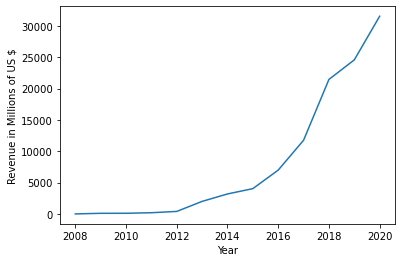

In [10]:
import matplotlib.pyplot as plt

plt.plot(tesla['Date'], tesla['Revenue(Millions of US $)'])
plt.xlabel("Year")
plt.ylabel("Revenue in Millions of US $")


## Author

### Debarshi Biswas